In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import figure
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
df = pd.read_csv('/content/valo_data_all 1000.csv')
df = df.drop('id',axis=1)
df['region'] = df['region'].astype(pd.StringDtype())
df['top_agent_nam'] = df['top_agent_nam'].astype(pd.StringDtype())
df['rank'] = df['rank'].astype(pd.StringDtype())

df.replace(',','', regex=True, inplace=True)
c = df.select_dtypes(object).columns
df[c] = df[c].apply(pd.to_numeric,errors='coerce')
df.head()

,rank,win%,k/d,dmg/rnd,region,acc_head_%,acc_head_hits,acc_body_%,acc_body_hits,acc_leg_%,...,headshot_%,wins_total,kills_total,avg_kill_per_rnd,top_agent_nam,top_agent_time_hrs,top_agent_matchs,top_agent_win_%,top_agent_kd_avg,top_agent_adr
0,Iron 3,63.6,2.27,232.5,US,28.4,357,66.7,838,4.9,...,25.2,19,510,1.1,Reyna,5.0,11,90.9,3.48,301.1
1,Platinum 3,45.9,1.30,176.5,HU,24.7,323,70.4,922,5.0,...,23.4,156,5922,0.9,Chamber,49.0,85,56.5,1.46,187.5
2,Diamond 3,50.0,0.89,120.7,US,19.8,201,70.3,714,9.9,...,16.5,138,3456,0.7,Omen,68.0,120,56.7,1.04,140.2
3,Platinum 2,65.4,1.05,147.1,FR,9.5,136,76.1,1093,14.5,...,12.8,111,3400,0.7,KAY/O,69.0,117,53.0,1.06,151.0
4,Diamond 1,43.2,1.07,154.4,HU,16.7,215,74.6,959,8.6,...,17.1,703,23380,0.8,Jett,297.0,497,50.9,1.16,161.2


In [ ]:
df3 = df
df3 = df.replace({
                   'Iron 1':1,'Iron 2':2,'Iron 3':3,
                   'Bronze 1':4,'Bronze 2':5,'Bronze 3':6,
                   'Silver 1':7,'Silver 2':8,'Silver 3':9,
                   'Gold 1':10,'Gold 2':11,'Gold 3':12,
                   'Platinum 1':13,'Platinum 2':14,'Platinum 3':15,
                   'Diamond 1':16,'Diamond 2':17,'Diamond 3':18,
                   'Ascendant 1':19,'Ascendant 2':20,'Ascendant 3':21,
                   'Immortal 1':22,'Immortal 2':23,'Immortal 3':24,
                   'Radiant':25,'Unranked':-1
                   })
df3.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
print(df3.shape)
df3 = df3.drop(df3[df3['rank'] == -1].index)
print(df3.shape)
df3 = df3.drop(df3[df3['top_agent_nam'] == '0'].index)
print(df3.shape)

print(df.shape)
df = df.drop(df[df['rank'] == "Unranked"].index)
print(df.shape)
df = df.drop(df[df['top_agent_nam'] == '0'].index)
print(df.shape)


(1073, 22)
(1018, 22)
(999, 22)
(1073, 22)
(1018, 22)
(999, 22)


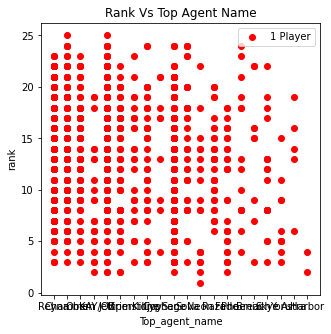

In [ ]:
plt.scatter(df3['top_agent_nam'], df3['rank'], color='red', label='1 Player')
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Rank Vs Top Agent Name')
plt.legend()
plt.xlabel('Top_agent_name')
plt.ylabel('rank')
# plt.show()
plt.savefig('RankVsTopAgentName')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df3['region']=le.fit_transform(df3['region'])
df3['top_agent_nam']=le.fit_transform(df3['top_agent_nam'])

df3.head()

,rank,win%,k/d,dmg/rnd,region,acc_head_%,acc_head_hits,acc_body_%,acc_body_hits,acc_leg_%,...,headshot_%,wins_total,kills_total,avg_kill_per_rnd,top_agent_nam,top_agent_time_hrs,top_agent_matchs,top_agent_win_%,top_agent_kd_avg,top_agent_adr
0,3,63.6,2.27,232.5,87,28.4,357,66.7,838,4.9,...,25.2,19,510,1.1,14,5.0,11,90.9,3.48,301.1
1,15,45.9,1.30,176.5,38,24.7,323,70.4,922,5.0,...,23.4,156,5922,0.9,3,49.0,85,56.5,1.46,187.5
2,18,50.0,0.89,120.7,87,19.8,201,70.3,714,9.9,...,16.5,138,3456,0.7,11,68.0,120,56.7,1.04,140.2
3,14,65.4,1.05,147.1,30,9.5,136,76.1,1093,14.5,...,12.8,111,3400,0.7,8,69.0,117,53.0,1.06,151.0
4,16,43.2,1.07,154.4,38,16.7,215,74.6,959,8.6,...,17.1,703,23380,0.8,7,297.0,497,50.9,1.16,161.2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Y=df3.iloc[:,0]
Y=Y.astype(float)
X=df3.iloc[:,1:22]

Y2=df3.iloc[:,0]
X2=df3.iloc[:,1:22]

X=pd.DataFrame(scaler.fit_transform(df3),index=df3.index, columns=df3.columns)

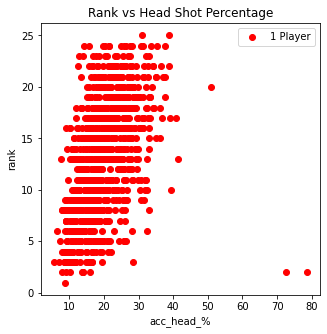

In [ ]:
plt.scatter(df3['acc_head_%'], df3['rank'], color='red', label='1 Player')
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Rank vs Head Shot Percentage')
plt.legend()
plt.xlabel('acc_head_%')
plt.ylabel('rank')
# plt.show()
plt.savefig('RankVsHeadShot%')

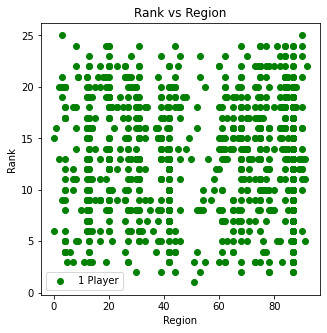

In [ ]:
plt.scatter(df3['region'], df3['rank'], color='green', label='1 Player')
plt.title('Rank vs Region')
plt.xlabel('Region')
plt.ylabel('Rank')
plt.legend()
plt.rcParams["figure.figsize"] = (5,5)
# plt.show()
plt.savefig('RankVsRegion')

In [ ]:
X = X.drop('region',axis=1)
X = X.drop('top_agent_nam',axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, Y2, test_size=0.2)


In [ ]:
model = LinearRegression()
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
preds = preds.astype(int)
print("\nTest")
print(accuracy_score(ytest.astype(int), preds))

print(mean_squared_error(ytest,preds))

preds = model.predict(xtrain)
preds = preds.astype(int)
print("Train")
print(accuracy_score(ytrain.astype(int), preds))





Test
0.595
0.405
Train
0.5694618272841051


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression, k=17)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(21,'Score'))  #print 10 best features

               Feature         Score
11          headshot_%  4.420958e+02
12          wins_total  3.241170e+02
8            acc_leg_%  3.231964e+02
13         kills_total  3.199843e+02
10       matchs_played  2.942336e+02
4           acc_head_%  2.821634e+02
9         acc_leg_hits  2.742507e+02
5        acc_head_hits  2.308754e+02
15  top_agent_time_hrs  1.502094e+02
16    top_agent_matchs  1.481929e+02
14    avg_kill_per_rnd  1.396694e+02
6           acc_body_%  9.790690e+01
7        acc_body_hits  9.381630e+01
18    top_agent_kd_avg  7.627508e+01
19       top_agent_adr  7.447567e+01
17     top_agent_win_%  3.633507e+01
1                 win%  3.247400e+01
3              dmg/rnd  1.349716e+01
2                  k/d  7.346702e+00
0                 rank -2.245044e+18


10.253277576751806


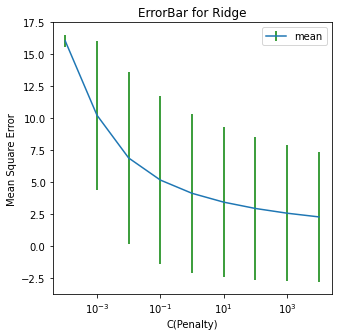

In [ ]:
cArr = [0.0001, 0.001, 0.01, 0.1, 1, 10,100, 1000,10000]


mse = [] 
mean=[] 
std=[] 
for c in cArr:
  ridgeModel = Ridge(alpha=1/(2*c))
  for train, test in KFold(n_splits=5).split(df3):
    ridgeModel.fit(X.iloc[train], Y.iloc[train])
    yPredR = ridgeModel.predict(X.iloc[test])
    mse.append(mean_squared_error(Y.iloc[test],yPredR))
    # print(mse)
  mean.append(np.array(mse).mean()) 
  std.append(np.array(mse).std())

fig = plt.figure()
plt.errorbar(cArr, mean, yerr=std, ecolor='green', label='mean') 
plt.title('ErrorBar for Ridge')
plt.xlabel('C(Penalty)')
plt.ylabel('Mean Square Error')
plt.xscale('log')
plt.legend()
plt.savefig('ErrorBar for Ridge')

print(mean[1])

In [ ]:
model = Ridge(alpha= 1/(2*0.001))
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
preds = preds.astype(int)
print("\nTest")
print(accuracy_score(ytest.astype(int), preds),c)

preds = model.predict(xtrain)
preds = preds.astype(int)
print("Train")
print(accuracy_score(ytrain.astype(int), preds),c)


Test
0.175 10000
Train
0.17897371714643304 10000


29.28329904197011


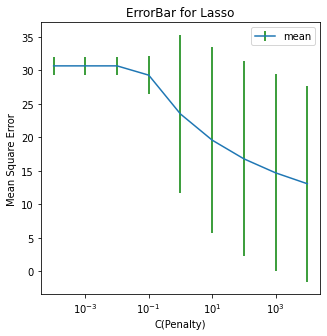

In [ ]:
mse = [] 
mean=[] 
std=[] 

cArr = [0.0001, 0.001, 0.01, 0.1, 1, 10,100, 1000,10000]

for c in cArr:
  lassoModel = Lasso(alpha=1/(2*c))
  for train, test in KFold(n_splits=5).split(df3):
    lassoModel.fit(X.iloc[train], Y.iloc[train])
    yPredR = lassoModel.predict(X.iloc[test])
    from sklearn.metrics import mean_squared_error
    mse.append(mean_squared_error(Y.iloc[test],yPredR))
    # print(mse)
  mean.append(np.array(mse).mean()) 
  std.append(np.array(mse).std())

plt.errorbar(cArr, mean, yerr=std, ecolor='green',label='mean') 
plt.title('ErrorBar for Lasso')
plt.xlabel('C(Penalty)')
plt.ylabel('Mean Square Error')
plt.xscale('log')
plt.legend()

plt.savefig('ErrorBar for Lasso')

print(mean[3])

In [ ]:
model = Lasso(alpha= 1/(2*0.1))
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
preds = preds.astype(int)
print("\nTest")
print(accuracy_score(ytest.astype(int), preds),c)

preds = model.predict(xtrain)
preds = preds.astype(int)
print("Train")
print(accuracy_score(ytrain.astype(int), preds),c)


Test
0.16 10000
Train
0.10888610763454318 10000


10.895288944723621


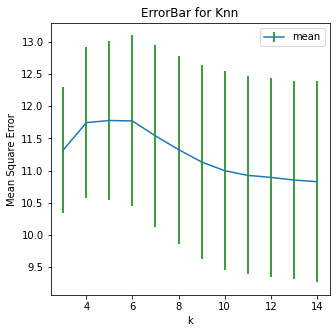

In [ ]:
mse = [] 
mean=[] 
std=[] 

val = range(3,15)

for k in val:
  knnModel = KNeighborsClassifier(n_neighbors=k,weights='uniform')
  for train, test in KFold(n_splits=5).split(df3):
    knnModel.fit(X.iloc[train], Y.iloc[train])
    yPredR = knnModel.predict(X.iloc[test])
    from sklearn.metrics import mean_squared_error
    mse.append(mean_squared_error(Y.iloc[test],yPredR))
    # print(mse)
  mean.append(np.array(mse).mean()) 
  std.append(np.array(mse).std())
plt.errorbar(val, mean, yerr=std, ecolor='green',label='mean') 
plt.title('ErrorBar for Knn')
plt.xlabel('k')
plt.ylabel('Mean Square Error')
# plt.xscale('log')
plt.legend()
plt.savefig('ErrorBar for Knn')

print(mean[9])

In [ ]:

model = KNeighborsClassifier(n_neighbors=11,weights='uniform')
model.fit(xtrain, ytrain)
preds = model.predict(xtest)
preds = preds.astype(int)
print("\nTest")
print(accuracy_score(ytest.astype(int), preds),k)

preds = model.predict(xtrain)
preds = preds.astype(int)
print("Train")
print(accuracy_score(ytrain.astype(int), preds),k)



Test
0.12 14
Train
0.2928660826032541 14


18.919335427135678


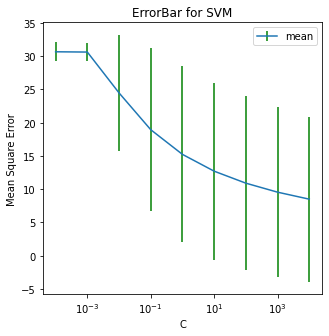

In [ ]:
mse = [] 
mean=[] 
std=[] 

val = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]

for c in val:
  model = svm.SVC(kernel='linear',C = c)
  for train, test in KFold(n_splits=5).split(df3):
    model.fit(X.iloc[train], Y.iloc[train])
    yPredR = model.predict(X.iloc[test])
    from sklearn.metrics import mean_squared_error
    mse.append(mean_squared_error(Y.iloc[test],yPredR))
    # print(mse)
  mean.append(np.array(mse).mean()) 
  std.append(np.array(mse).std())
plt.errorbar(val, mean, yerr=std, ecolor='green',label='mean') 
plt.title('ErrorBar for SVM')
plt.xlabel('C')
plt.ylabel('Mean Square Error')
plt.xscale('log')
plt.savefig('ErrorBar for SVM')
plt.legend()

print(mean[3])

In [ ]:
from sklearn import svm


clf = svm.SVC(kernel='linear',C = 0.1)

clf.fit(xtrain, ytrain)
preds = clf.predict(xtest)
preds = preds.astype(int)
print('\nTest:')
print(accuracy_score(ytest.astype(int), preds),c)

prev = clf.predict(xtrain)
prev = prev.astype(int)
print('Train:')
print(accuracy_score(ytrain.astype(int), prev), c)



Test:
0.2 10000
Train:
0.36795994993742176 10000


In [ ]:
from sklearn.dummy import DummyClassifier

DMFmdl = DummyClassifier(strategy = 'most_frequent', random_state = 0, constant ='M')
DMFmdl.fit(xtrain, ytrain)

preds = DMFmdl.predict(xtest)
mean_squared_error(ytest,preds)

mse = mean_squared_error(ytest,preds)
print(accuracy_score(ytest, preds))
print(mse)

preds = DMFmdl.predict(xtrain)
mse = mean_squared_error(ytrain,preds)
print(accuracy_score(ytrain, preds))


0.035
60.685
0.06633291614518148
